<a href="https://colab.research.google.com/github/pwirap/Improving-Employee-Retention-by-Predicting-Employee-Attrition-Using-Machine-Learning/blob/main/PHILIPUS_Improving_Employee_Retention_by_Predicting_Employee_Attrition_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : PHILPUS DIMA WIRA PRATOMO

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy import stats

from datetime import datetime

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

## Load and Data Understanding

In [ ]:
df = pd.read_excel("Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx")

In [ ]:
pd.set_option('display.max_columns', None)
df.sample(10)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
147,brainyLlama9,100884,Menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,LinkedIn,3,5.0,0.0,0.0,20.0,+6285503547xxx,brainyLlama9557@gmail.com,Sarjana,1,NaN,Product Design (UI & UX),1969-02-09,2012-03-07,2014-02-01,2016-4-24
18,hushedSeahorse7,111202,Bercerai,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,3,4.0,0.0,0.0,17.0,+6281212698xxx,hushedSeahorse7404@icloud.com,Sarjana,1,1.0,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12
167,trustingCrane4,111198,Menikah,Pria,FullTime,Product Manager,Mid_level,Biasa,Jakarta Utara,Website,2,4.0,0.0,0.0,7.0,+6283126068xxx,trustingCrane4883@icloud.com,Sarjana,1,0.0,masih_bekerja,1984-07-01,2016-07-06,2020-1-29,-
100,worldlyPaella8,111157,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,3,4.0,0.0,0.0,14.0,+6285508465xxx,worldlyPaella8406@yahoo.com,Sarjana,1,NaN,masih_bekerja,1986-07-07,2014-01-06,2020-2-26,-
42,excludedPorpoise4,110363,Bercerai,Wanita,Outsource,Product Design (UI & UX),Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,4,5.0,0.0,0.0,12.0,+6289919120xxx,excludedPorpoise4252@icloud.com,Sarjana,1,1.0,masih_bekerja,1970-10-27,2011-04-04,2020-1-14,-
137,mellowCheese4,101130,Bercerai,Wanita,Outsource,Software Engineer (Front End),Mid_level,Kurang,Jakarta Utara,Diversity_Job_Fair,4,4.0,5.0,0.0,14.0,+6289720470xxx,mellowCheese4272@gmail.com,Sarjana,1,NaN,tidak_bahagia,1988-10-05,2011-1-21,2020-1-25,2014-9-24
244,curiousMackerel5,100667,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Bagus,Jakarta Pusat,Google_Search,4,4.0,0.0,0.0,4.0,+6289758085xxx,curiousMackerel5858@hotmail.com,Sarjana,1,NaN,NaN,1973-11-28,2014-9-18,2020-1-15,-
286,puzzledFish5,106214,Menikah,Pria,Internship,Data Analyst,Mid_level,Bagus,Jakarta Barat,Indeed,4,3.0,0.0,0.0,2.0,+6287722818xxx,puzzledFish5776@hotmail.com,Sarjana,1,NaN,NaN,1981-08-10,2012-8-16,2020-1-14,-
59,lazyToucan3,106660,Bercerai,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Kurang,Jakarta Utara,Diversity_Job_Fair,3,5.0,0.0,0.0,11.0,+6287705186xxx,lazyToucan3860@gmail.com,Magister,1,NaN,masih_bekerja,1975-04-03,2009-4-27,2013-2-15,-
193,cheerfulPear0,100874,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Biasa,Jakarta Utara,CareerBuilder,4,5.0,0.0,0.0,17.0,+6285930735xxx,cheerfulPear0374@hotmail.com,Magister,1,NaN,tidak_bisa_remote,1983-05-21,2011-2-21,2014-06-03,2018-04-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
for col in df:
    unique_values = df[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values))
    print()

Column: Username
Unique values: ['spiritedPorpoise3', 'jealousGelding2', 'pluckyMuesli3', 'stressedTruffle1', 'shyTermite7', 'emptyMacaw4', 'madZebra1', 'cynicalMandrill7', 'lyingMussel8', 'enviousMoth4', 'puzzledCake4', 'grizzledSnipe7', 'yearningBagels0', 'sheepishSheep9', 'madWildfowl7', 'enviousSalami4', 'pacifiedRaisins7', 'wrathfulMagpie6', 'hushedSeahorse7', 'guiltyMoth4', 'peacefulCoati5', 'dejectedPolenta7', 'needfulLeopard2', 'offendedIguana0', 'pluckyHoopoe3', 'needySyrup4', 'forsakenOwl1', 'pluckyApples4', 'guiltySnail8', 'grizzledFlamingo9', 'worriedSyrup7', 'somberBoars0', 'giddyMallard9', 'madFerret4', 'mereCaribou1', 'decimalAbalone6', 'blissfulMussel3', 'ardentLapwing0', 'peskyTeal7', 'blissfulHyena1', 'solidMacaw1', 'cautiousPolenta9', 'excludedPorpoise4', 'shamefulIguana0', 'shySyrup7', 'forsakenCow7', 'grumpyFish4', 'wingedPorpoise5', 'soreCaribou0', 'needfulCardinal0', 'giddyCheetah9', 'hushedOil9', 'crummyPudding5', 'selfishBasmati2', 'adoringCardinal9', 'imported

**Checking For Null Values**

In [ ]:
misval1 = df.isnull().sum()
print(misval1.sort_values(ascending=False))

IkutProgramLOP                        258
AlasanResign                           66
JumlahKetidakhadiran                    6
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
TanggalPenilaianKaryawan                0
TanggalHiring                           0
TanggalLahir                            0
PernahBekerja                           0
TingkatPendidikan                       0
Email                                   0
NomorHP                                 0
Username                                0
EnterpriseID                            0
SkorSurveyEngagement                    0
HiringPlatform                          0
AsalDaerah                              0
PerformancePegawai                      0
JenjangKarir                            0
Pekerjaan                               0
StatusKepegawaian                       0
JenisKelamin                            0
StatusPernikahan                  

There is some Null Values:
1. IkutProgramLOP                        258
2. AlasanResign                           66
3. JumlahKetidakhadiran                    6
4. SkorKepuasanPegawai                     5
5. JumlahKeikutsertaanProjek               3
6. JumlahKeterlambatanSebulanTerakhir      1

**Checking for Data Duplicates**

In [ ]:
df.duplicated().sum()

0

there are no duplicate data

Summary :
1. The dataset has 287 records and 25 features
2. SkorKepuasanPegawai, JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir, JumlahKetidakhadiran, IkutProgramLOP
can be change to INT64
3. TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, TanggalResign can be change to DateFrame
4. There is some Null Values in IkutProgramLOP, AlasanResign, JumlahKetidakhadiran, SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir
5. The phrase "yes" in "PernahBekerja" can be changed to 1
6. The phrase "-" in "StatusPernikahan" can be changed to "Lainnya"
7. The phrase 'Product Design (UI & UX)' in "AlasanResign" can be changed into modus in "AlasanResign"

## Data Cleaning & Data Preprocessing

**1. Handling Type Data**

In [ ]:
data_datypes = df.copy()

In [ ]:
data_datypes['SkorKepuasanPegawai'] = pd.to_numeric(data_datypes['SkorKepuasanPegawai'], errors='coerce').astype(pd.Int64Dtype())
data_datypes['JumlahKeikutsertaanProjek'] = pd.to_numeric(data_datypes['JumlahKeikutsertaanProjek'], errors='coerce').astype(pd.Int64Dtype())
data_datypes['JumlahKeterlambatanSebulanTerakhir'] = pd.to_numeric(data_datypes['JumlahKeterlambatanSebulanTerakhir'], errors='coerce').astype(pd.Int64Dtype())
data_datypes['JumlahKetidakhadiran'] = pd.to_numeric(data_datypes['JumlahKetidakhadiran'], errors='coerce').astype(pd.Int64Dtype())
data_datypes['IkutProgramLOP'] = pd.to_numeric(data_datypes['IkutProgramLOP'], errors='coerce').astype(pd.Int64Dtype())
data_datypes['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'], errors='coerce')
data_datypes['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'], errors='coerce')
data_datypes['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'], errors='coerce')
data_datypes['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

**2. Handling Incompatible Data**

In [ ]:
data_incomp = data_datypes.copy()

In [ ]:
data_incomp['PernahBekerja'] = data_incomp['PernahBekerja'].replace('yes', 1)
data_incomp['StatusPernikahan'] = data_incomp['StatusPernikahan'].replace('-', 'Lainnya')
data_incomp['AlasanResign'] = data_incomp['AlasanResign'].replace('Product Design (UI & UX)', data_incomp['AlasanResign'].mode()[0])

**3. Handling Missing Value**

Handling missing values ​​will be carried out on Mode in IkutProgramLOP, AlasanResign, JumlahKetidakhadiran, SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir Features

In [ ]:
data_missvalue = data_incomp.copy()

In [ ]:
data_missvalue['IkutProgramLOP'] = data_missvalue['IkutProgramLOP'].fillna(data_missvalue['IkutProgramLOP'].mode()[0])
data_missvalue['AlasanResign'] = data_missvalue['AlasanResign'].fillna(data_missvalue['AlasanResign'].mode()[0])
data_missvalue['JumlahKetidakhadiran'] = data_missvalue['JumlahKetidakhadiran'].fillna(data_missvalue['JumlahKetidakhadiran'].mode()[0])
data_missvalue['SkorKepuasanPegawai'] = data_missvalue['SkorKepuasanPegawai'].fillna(data_missvalue['SkorKepuasanPegawai'].mode()[0])
data_missvalue['JumlahKeikutsertaanProjek'] = data_missvalue['JumlahKeikutsertaanProjek'].fillna(data_missvalue['JumlahKeikutsertaanProjek'].mode()[0])
data_missvalue['JumlahKeterlambatanSebulanTerakhir'] = data_missvalue['JumlahKeterlambatanSebulanTerakhir'].fillna(data_missvalue['JumlahKeterlambatanSebulanTerakhir'].mode()[0])

**4. Feature Engineering**

1. Adding new features: TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan and TanggalResign to extract the year.
2. Creating a new feature where if the ResignationDate is null, it represents 'no,' while if there is a date, it signifies 'yes.'

In [ ]:
data_feature = data_missvalue.copy()

In [ ]:
data_feature['year_TanggalLahir'] = data_feature['TanggalLahir'].dt.year
data_feature['year_TanggalHiring'] = data_feature['TanggalHiring'].dt.year
data_feature['year_TanggalPenilaianKaryawan'] = data_feature['TanggalPenilaianKaryawan'].dt.year
data_feature['year_TanggalResign'] = data_feature['TanggalResign'].dt.year

In [ ]:
data_feature['resign_flag'] = data_feature['TanggalResign'].apply(lambda x: 1 if pd.notna(x) else 0)

In [ ]:
data_feature

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,year_TanggalLahir,year_TanggalHiring,year_TanggalPenilaianKaryawan,year_TanggalResign,resign_flag
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4,0,0,9,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,1972,2011,2016,NaN,0
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4,4,0,3,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,1984,2014,2020,2018.0,1
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3,0,0,11,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,1974,2011,2016,2014.0,1
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3,0,4,6,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,1979,2014,2020,NaN,0
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3,0,0,11,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,1974,2013,2020,2018.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,5,0,0,16,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,1,1,masih_bekerja,1973-12-08,2011-09-26,2016-03-01,NaT,1973,2011,2016,NaN,0
283,yearningPorpoise4,106254,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,5,0,0,11,+6281222782xxx,yearningPorpoise4421@yahoo.com,Sarjana,1,1,jam_kerja,1974-12-01,2013-05-13,2020-01-28,2017-11-15,1974,2013,2020,2017.0,1
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,5,0,0,17,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,1,1,ganti_karir,1969-10-30,2013-11-11,2020-01-21,2018-06-08,1969,2013,2020,2018.0,1
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,5,0,0,20,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,1,0,kejelasan_karir,1981-10-01,2011-05-16,2014-04-05,2018-04-01,1981,2011,2014,2018.0,1


## EDA

**Annual Report on Employee Number Changes**

In [ ]:
data_eda = data_feature.copy()

In [ ]:
df_group_hiring = data_eda.groupby(['year_TanggalHiring']).agg(
    total_year_hiring=('year_TanggalHiring', 'count')
).reset_index()

df_group_resign = data_eda.groupby(['year_TanggalResign']).agg(
    total_year_resign=('resign_flag', 'sum')
).reset_index()

merged_df = pd.merge(df_group_hiring, df_group_resign, left_on='year_TanggalHiring', right_on='year_TanggalResign', how='outer')

merged_df['year_TanggalHiring'] = merged_df['year_TanggalHiring'].fillna({13: 2019, 14: 2020})
merged_df['year_TanggalResign'] = merged_df['year_TanggalHiring'].fillna({0: 2006, 1: 2007, 2: 2008, 3: 2009, 4: 2010, 5: 2011, 6: 2012})
merged_df = merged_df.fillna(0)

merged_df = merged_df[['year_TanggalHiring','total_year_hiring','total_year_resign']]

merged_df.rename(columns={'year_TanggalHiring': 'Year'}, inplace=True)
merged_df["sum"] = merged_df["total_year_hiring"] - merged_df["total_year_resign"]
merged_df['Year'] = pd.to_numeric(merged_df['Year'], errors='coerce').astype(pd.Int64Dtype())
merged_df['sum'] = pd.to_numeric(merged_df['sum'], errors='coerce').astype(pd.Int64Dtype())

In [ ]:
merged_df

,Year,total_year_hiring,total_year_resign,sum
0,2006,1.0,0.0,1
1,2007,2.0,0.0,2
2,2008,2.0,0.0,2
3,2009,7.0,0.0,7
4,2010,8.0,0.0,8
5,2011,76.0,0.0,76
6,2012,41.0,0.0,41
7,2013,43.0,5.0,38
8,2014,56.0,12.0,44
9,2015,31.0,8.0,23


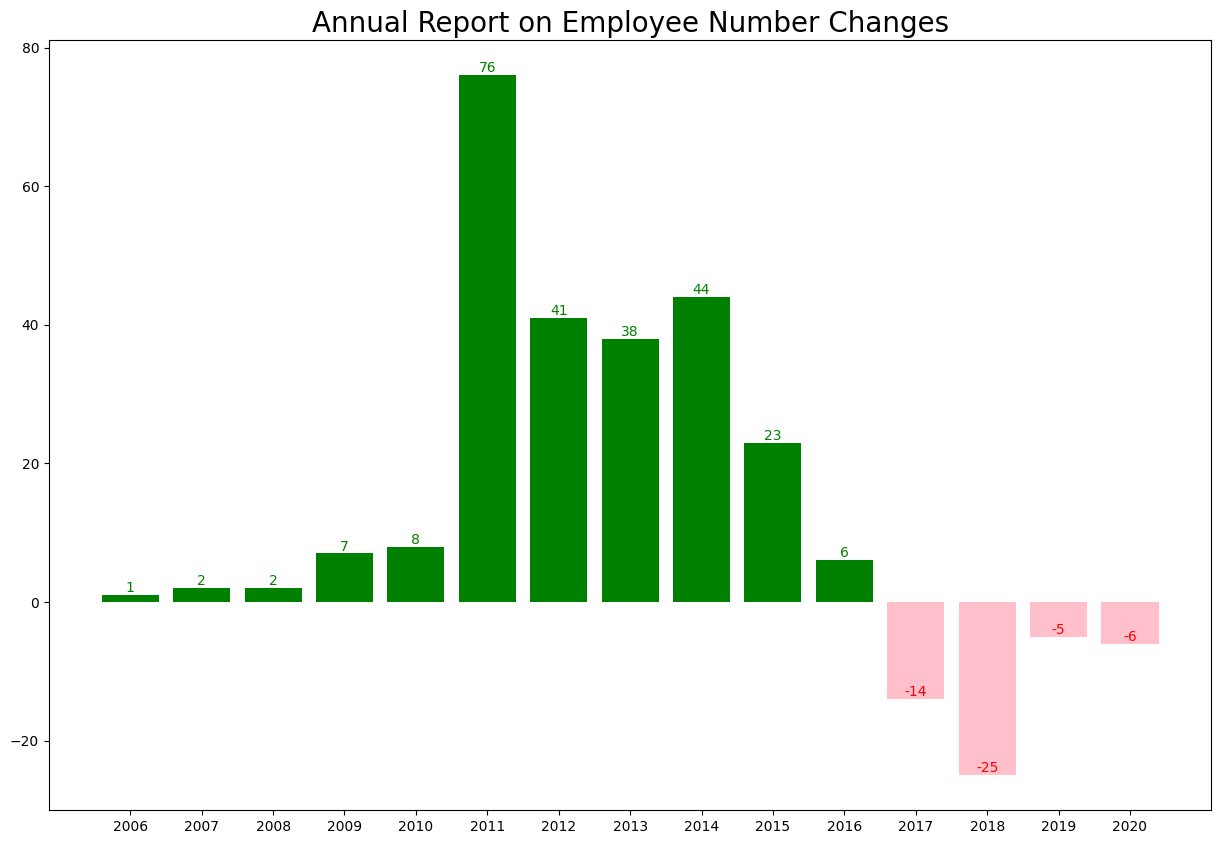

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=merged_df, x='Year', y='sum', palette='YlGnBu')
plt.title("Annual Report on Employee Number Changes",fontsize=20)
plt.xlabel("", fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel("", fontsize=10)
plt.yticks(fontsize=10)

for index, row in merged_df.iterrows():
    if row['sum'] >= 0:
        ax.bar(index, row['sum'], color='green')
    else:
        ax.bar(index, row['sum'], color='pink')

for index, row in merged_df.iterrows():
    color = 'green' if row['sum'] >= 0 else 'red'
    ax.text(index, row['sum'], str(row['sum']), color=color, ha='center', va='bottom', fontsize=10)

plt.show()

**Resign Reason Analysis for Employee Attrition Management Strategy**

In [ ]:
data_eda_stay = data_eda[data_eda["resign_flag"] == 0]
data_eda_resign = data_eda[data_eda["resign_flag"] == 1]

data_eda_stay_group = data_eda_stay.groupby(['Pekerjaan']).agg(
    total_karyawan_stay=('EnterpriseID', 'count')
).reset_index()

data_eda_resign_group = data_eda_resign.groupby(['Pekerjaan']).agg(
    total_karyawan_resign=('EnterpriseID', 'count')
).reset_index()

merged_data = pd.merge(data_eda_stay_group, data_eda_resign_group, left_on='Pekerjaan', right_on='Pekerjaan', how='outer')

merged_data = merged_data.fillna(0)

total_karyawan = merged_data['total_karyawan_stay'] + merged_data['total_karyawan_resign']
merged_data['total_karyawan'] = total_karyawan


merged_data["persentase_jumlah_employee"] = round((merged_data["total_karyawan_stay"] / merged_data["total_karyawan"]) *100,2)
merged_data = merged_data.sort_values(by='persentase_jumlah_employee', ascending=False)

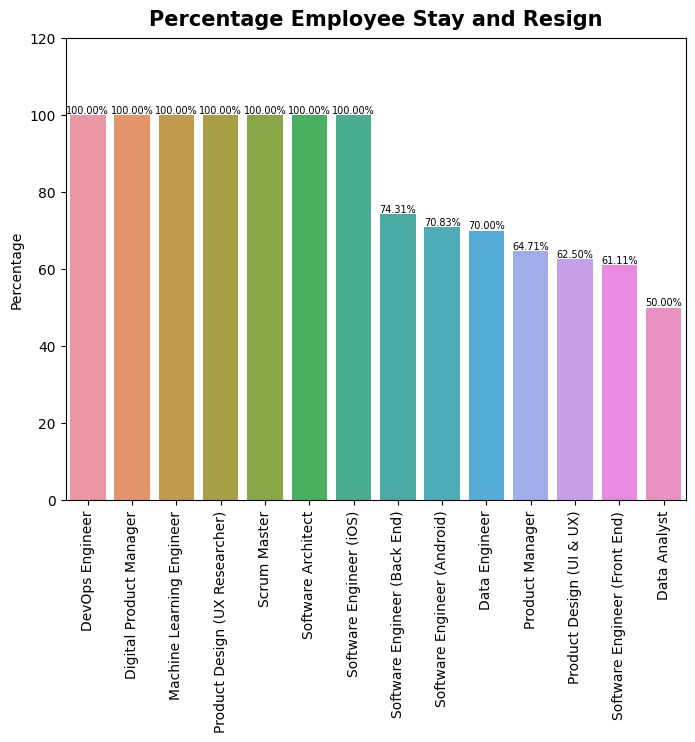

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=merged_data, x='Pekerjaan', y='persentase_jumlah_employee')
plt.title('Percentage Employee Stay and Resign', fontsize=15, weight='bold', y=1.01)
plt.ylim(0,120)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("",fontsize=10)
plt.ylabel("Percentage",fontsize=10)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=7, color='black')

In [ ]:
data_eda_dataanalyst = data_eda[data_eda["Pekerjaan"] == "Data Analyst"]
data_eda_dataanalyst = data_eda_dataanalyst[data_eda_dataanalyst["resign_flag"] == 1]

data_eda_dataanalyst_group = data_eda_dataanalyst.groupby(['JenjangKarir','PerformancePegawai','AlasanResign']).agg(
    total_karyawan_resign=('EnterpriseID', 'count')
).reset_index()

data_eda_dataanalyst_group

,JenjangKarir,PerformancePegawai,AlasanResign,total_karyawan_resign
0,Freshgraduate_program,Bagus,toxic_culture,1
1,Freshgraduate_program,Biasa,internal_conflict,1
2,Freshgraduate_program,Biasa,toxic_culture,1
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1


In [ ]:
performance_totals = data_eda_dataanalyst_group.groupby('PerformancePegawai')['total_karyawan_resign'].sum().reset_index()
performance_totals.rename(columns={'total_karyawan_resign': 'TotalPerfPegawai'}, inplace=True)
data_eda_dataanalyst_group = data_eda_dataanalyst_group.merge(
    performance_totals, on='PerformancePegawai', how='left'
)
data_eda_dataanalyst_group['Rasio']= round((data_eda_dataanalyst_group['total_karyawan_resign']/data_eda_dataanalyst_group['TotalPerfPegawai'])*100, 2)

In [ ]:
data_eda_dataanalyst_group

,JenjangKarir,PerformancePegawai,AlasanResign,total_karyawan_resign,TotalPerfPegawai,Rasio
0,Freshgraduate_program,Bagus,toxic_culture,1,1,100.0
1,Freshgraduate_program,Biasa,internal_conflict,1,2,50.0
2,Freshgraduate_program,Biasa,toxic_culture,1,2,50.0
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1,4,25.0
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3,4,75.0
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1,1,100.0


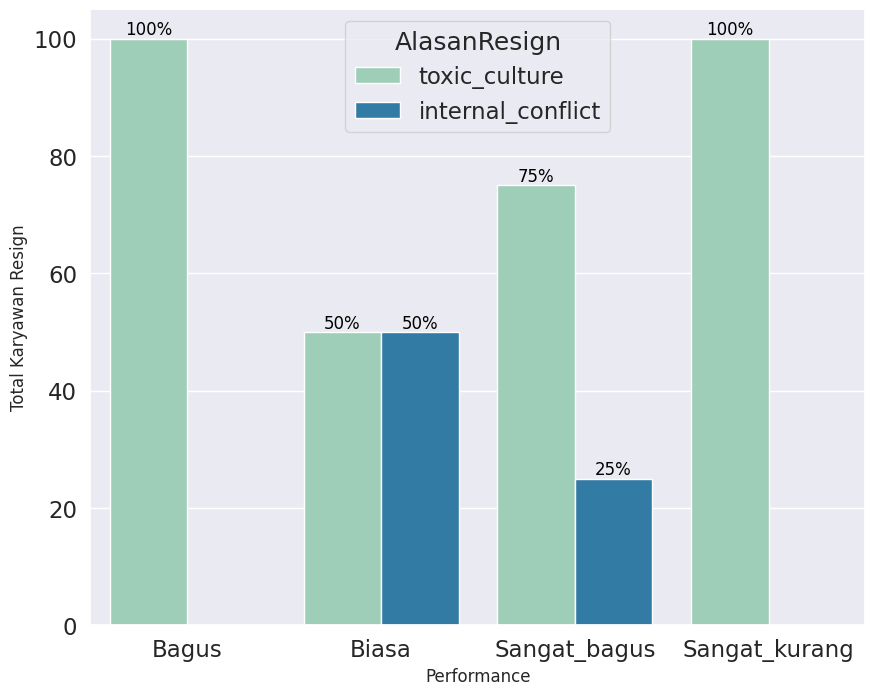

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=data_eda_dataanalyst_group, x='PerformancePegawai', y='Rasio', hue='AlasanResign', palette='YlGnBu')
plt.xlabel("Performance",fontsize=12)
plt.ylabel("Total Karyawan Resign",fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')


In [ ]:
df_group = data_eda_dataanalyst_group.groupby('Department').size().reset_index(name='Total')
df_group1=data_eda_dataanalyst_group.groupby(['Department','Attrition']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='Department', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='Department', y='Rasio', hue='Attrition', palette='YlGnBu')
plt.title('Attrition by Department (%)', fontsize=15, weight='bold', y=1.01)
plt.ylim(0,90)


#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')


In [ ]:
data_eda_dataanalyst_1 = data_eda[data_eda["Pekerjaan"] == "Data Analyst"]
data_eda_dataanalyst_1 = data_eda_dataanalyst_1[data_eda_dataanalyst_1["resign_flag"] == 1]

data_eda_dataanalyst_group_1 = data_eda_dataanalyst_1.groupby(['AlasanResign']).agg(
    total_karyawan_resign=('EnterpriseID', 'count')
).reset_index()

data_eda_dataanalyst_group_1["Total"] = data_eda_dataanalyst_group_1["total_karyawan_resign"].sum()
data_eda_dataanalyst_group_1["Rasio"] = round((data_eda_dataanalyst_group_1['total_karyawan_resign']/data_eda_dataanalyst_group_1['Total'])*100, 2)

data_eda_dataanalyst_group_1

,AlasanResign,total_karyawan_resign,Total,Rasio
0,internal_conflict,2,8,25.0
1,toxic_culture,6,8,75.0


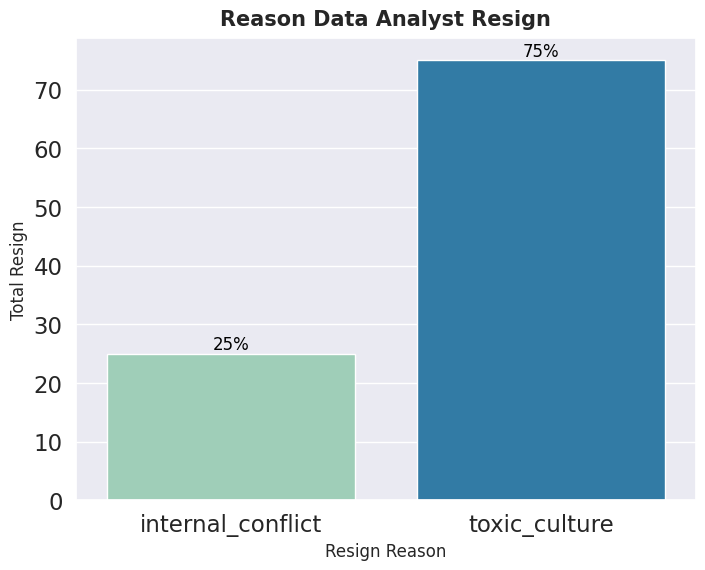

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=data_eda_dataanalyst_group_1, x='AlasanResign', y='Rasio', palette='YlGnBu')
plt.xlabel("Resign Reason",fontsize=12)
plt.ylabel("Total Resign",fontsize=12)
plt.title('Reason Data Analyst Resign', fontsize=15, weight='bold', y=1.01)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

## Feature Selection

In [ ]:
data_featureSel = data_eda.copy()

In [ ]:
#melihat unique value di setiap kolom bertipe object
for col in data_featureSel:
    unique_values = data_featureSel[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values))
    print()

Column: Username
Unique values: ['spiritedPorpoise3', 'jealousGelding2', 'pluckyMuesli3', 'stressedTruffle1', 'shyTermite7', 'emptyMacaw4', 'madZebra1', 'cynicalMandrill7', 'lyingMussel8', 'enviousMoth4', 'puzzledCake4', 'grizzledSnipe7', 'yearningBagels0', 'sheepishSheep9', 'madWildfowl7', 'enviousSalami4', 'pacifiedRaisins7', 'wrathfulMagpie6', 'hushedSeahorse7', 'guiltyMoth4', 'peacefulCoati5', 'dejectedPolenta7', 'needfulLeopard2', 'offendedIguana0', 'pluckyHoopoe3', 'needySyrup4', 'forsakenOwl1', 'pluckyApples4', 'guiltySnail8', 'grizzledFlamingo9', 'worriedSyrup7', 'somberBoars0', 'giddyMallard9', 'madFerret4', 'mereCaribou1', 'decimalAbalone6', 'blissfulMussel3', 'ardentLapwing0', 'peskyTeal7', 'blissfulHyena1', 'solidMacaw1', 'cautiousPolenta9', 'excludedPorpoise4', 'shamefulIguana0', 'shySyrup7', 'forsakenCow7', 'grumpyFish4', 'wingedPorpoise5', 'soreCaribou0', 'needfulCardinal0', 'giddyCheetah9', 'hushedOil9', 'crummyPudding5', 'selfishBasmati2', 'adoringCardinal9', 'imported

**Delete Unnecessary Feature**

The feature will be removed because there is too much unique data so there is a fear of being hit by the curse of dimensionality :
1. Username
2. EnterpriseID
3. NomorHP
4. Email

In [ ]:
data_featureSel = data_featureSel.drop(["Username","EnterpriseID","NomorHP","Email"],axis=1)

Features that will be removed because feature engineering has been carried out :
1. TanggalLahir
2. TanggalHiring
3. TanggalPenilaianKaryawan
4. TanggalResign
5. year_TanggalResign

In [ ]:
data_featureSel = data_featureSel.drop(["TanggalLahir","TanggalHiring","TanggalPenilaianKaryawan","TanggalResign","year_TanggalResign"],axis=1)

The feature that will be deleted is because it only contains 1 data :
1. PernahBekerja

In [ ]:
data_featureSel = data_featureSel.drop(["PernahBekerja"],axis=1)

**Mutual Information**

In [ ]:
data_mulin = data_featureSel.copy()

In [ ]:
data_mulin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   StatusPernikahan                    287 non-null    object
 1   JenisKelamin                        287 non-null    object
 2   StatusKepegawaian                   287 non-null    object
 3   Pekerjaan                           287 non-null    object
 4   JenjangKarir                        287 non-null    object
 5   PerformancePegawai                  287 non-null    object
 6   AsalDaerah                          287 non-null    object
 7   HiringPlatform                      287 non-null    object
 8   SkorSurveyEngagement                287 non-null    int64 
 9   SkorKepuasanPegawai                 287 non-null    Int64 
 10  JumlahKeikutsertaanProjek           287 non-null    Int64 
 11  JumlahKeterlambatanSebulanTerakhir  287 non-null    Int64 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

data_mulin['JenisKelamin'] = label.fit_transform(data_mulin['JenisKelamin'])
data_mulin['PerformancePegawai'] = label.fit_transform(data_mulin['PerformancePegawai'])
data_mulin['TingkatPendidikan'] = label.fit_transform(data_mulin['TingkatPendidikan'])
data_mulin['StatusPernikahan'] = label.fit_transform(data_mulin['StatusPernikahan'])
data_mulin['StatusKepegawaian'] = label.fit_transform(data_mulin['StatusKepegawaian'])
data_mulin['Pekerjaan'] = label.fit_transform(data_mulin['Pekerjaan'])
data_mulin['JenjangKarir'] = label.fit_transform(data_mulin['JenjangKarir'])
data_mulin['AsalDaerah'] = label.fit_transform(data_mulin['AsalDaerah'])
data_mulin['HiringPlatform'] = label.fit_transform(data_mulin['HiringPlatform'])
data_mulin['AlasanResign'] = label.fit_transform(data_mulin['AlasanResign'])

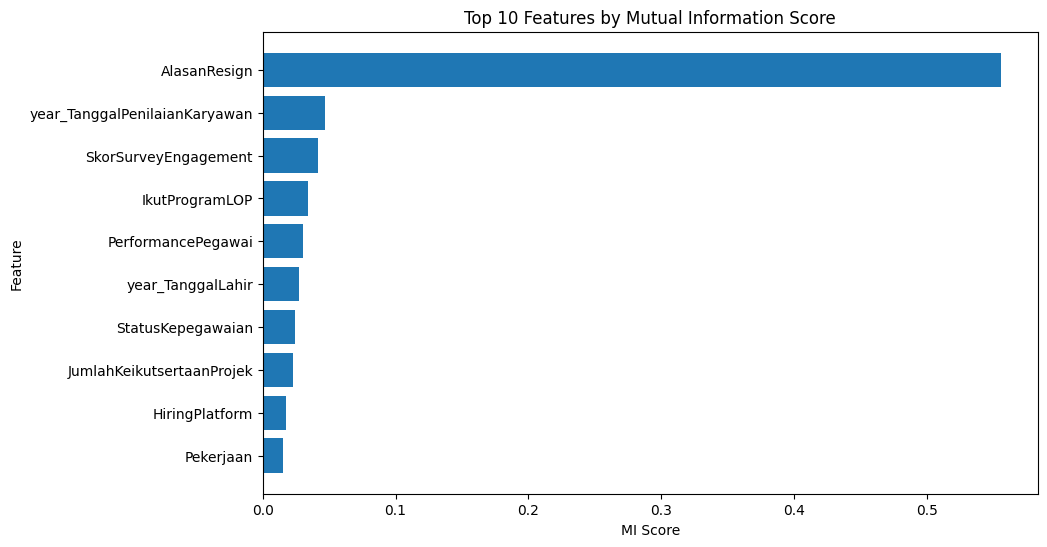

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd

np.random.seed(100)

X = data_mulin.drop(["resign_flag"], axis=1)
y = data_mulin['resign_flag']

mi_scores = mutual_info_classif(X, y)

mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})

mi_scores_df = mi_scores_df.sort_values(by='MI_Score', ascending=False)

top_n = 10  # Ganti dengan jumlah fitur yang ingin Anda tampilkan
top_features = mi_scores_df.head(top_n)

# Buat grafik
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['MI_Score'])
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Features by Mutual Information Score')
plt.gca().invert_yaxis()

After Mutual Information is carried out, the following features will be deleted :
1. JumlahKetidakhadiran
2. TingkatPendidikan
3. JumlahKeterlambatanSebulanTerakhir
4. JenisKelamin
5. HiringPlatform
6. year_TanggalHiring
7. StatusPernikahan
8. AsalDaerah

In [ ]:
data_featureSel = data_featureSel.drop(["JumlahKetidakhadiran","TingkatPendidikan","JumlahKeterlambatanSebulanTerakhir","JenisKelamin","HiringPlatform","year_TanggalHiring","StatusPernikahan","AsalDaerah","year_TanggalLahir","year_TanggalPenilaianKaryawan"],axis=1)

## Label Encoding and One Hot Encoding

In [ ]:
data_label = data_featureSel.copy()

In [ ]:
data_label

,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,IkutProgramLOP,AlasanResign,resign_flag
0,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,4,4,0,1,masih_bekerja,0
1,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,4,4,4,1,toxic_culture,1
2,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,4,3,0,1,jam_kerja,1
3,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,3,3,0,0,masih_bekerja,0
4,FullTime,Product Manager,Freshgraduate_program,Bagus,3,3,0,0,ganti_karir,1
...,...,...,...,...,...,...,...,...,...,...
282,FullTime,Data Engineer,Mid_level,Bagus,2,5,0,1,masih_bekerja,0
283,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,4,5,0,1,jam_kerja,1
284,FullTime,Software Engineer (Front End),Senior_level,Biasa,2,5,0,1,ganti_karir,1
285,FullTime,Software Engineer (Android),Mid_level,Bagus,4,5,0,0,kejelasan_karir,1


**Label Encoding**

The features that will be carried out by Label Encoding are as follows :
1. PerformancePegawai

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

data_label['PerformancePegawai'] = label.fit_transform(data_label['PerformancePegawai'])

**One Hot Encoding**

The features that will be carried out by label encoding are as follows :
1. StatusPernikahan
2. StatusKepegawaian
3. Pekerjaan
4. AsalDaerah
5. HiringPlatform
6. 	AlasanResign

In [ ]:
data_label = pd.get_dummies(data_label, columns = ['StatusKepegawaian','Pekerjaan','JenjangKarir','AlasanResign'])

## Modelling

The metric chosen for evaluation is Recall, which aims to minimize false negatives to ensure that identify as many at-risk employees as possible so it can take appropriate action to retain them.

In [ ]:
df_split = data_label.copy()

In [ ]:
uint8_columns = df_split.select_dtypes(include='uint8').columns
df_split[uint8_columns] = df_split[uint8_columns].astype('int64')

In [ ]:
X = df_split.drop(columns=['resign_flag'])
y = df_split['resign_flag']

Split Data Train dan Data Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Class Imbalanced

Checking for Class imbalanced in Data Train and Data Test

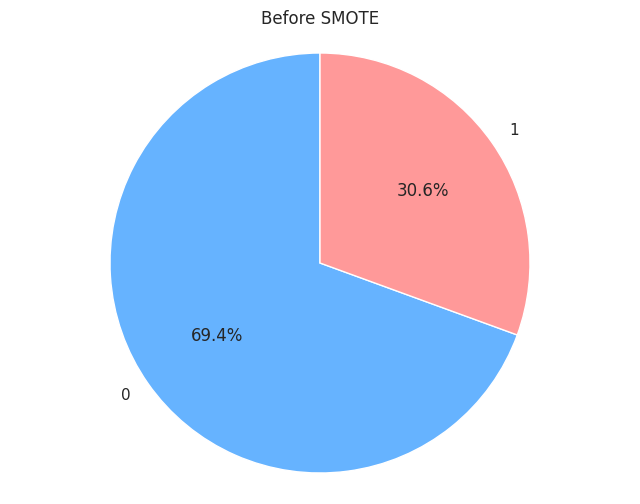

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
df_checkimbalance_train = y_train.value_counts()
labels = df_checkimbalance_train.index
plt.pie(df_checkimbalance_train, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Before SMOTE")
plt.axis('equal')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Pastikan tipe data X dan y adalah float64
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

# Applying SMOTE to address class imbalance
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_over, y_over = smote.fit_resample(X_train, y_train)

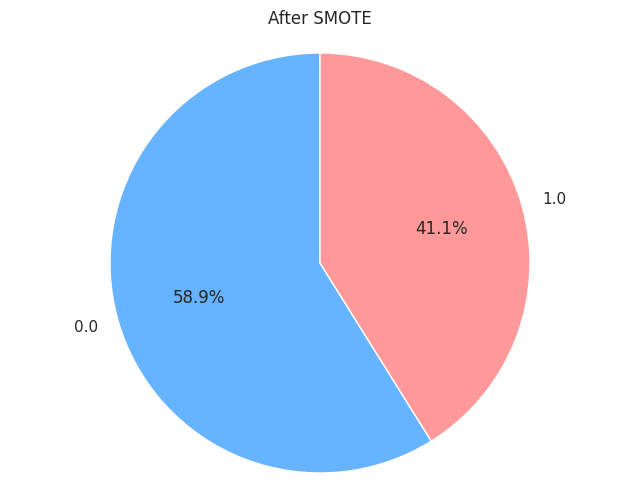

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
df_attrition = y_over.value_counts()
labels = df_attrition.index
plt.pie(df_attrition, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("After SMOTE")
plt.axis('equal')
plt.show()

In [ ]:
X_train = X_over
y_train = y_over

Modelling without Hyperparameter Tuning

In [ ]:
#Perhatikan Models yang digunakan
#Perhatikan cv yang digunakan
#Karena Fokus di Recall, maka cv hanya perhitungkan Train dan Test di Recall

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix

def evaluate_models(X_train, y_train, X_test, y_test):
    results = []

    # List of models to evaluate
    models = [
        ("Gradient Boosting", GradientBoostingClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Decision Trees", DecisionTreeClassifier()),
        ("SVM", SVC()),
        ("KNN", KNeighborsClassifier()),
        ("XGBoost", xgb.XGBClassifier())
    ]

    for model_name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)


        cf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10,6))
        sns.set(font_scale = 1.5)
        ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
        plt.title('Confusion Matrix ' + model_name,fontsize=12)
        ax.set_xlabel('Predicted Values',fontsize=10)
        ax.set_ylabel('Actual Values',fontsize=10)
        plt.show()

        accuracy_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
        accuracy_test = round(accuracy_score(y_test, y_pred) * 100, 2)
        precision_train = round(precision_score(y_train, y_train_pred) * 100, 2)
        precision_test = round(precision_score(y_test, y_pred) * 100, 2)
        recall_train = round(recall_score(y_train, y_train_pred) * 100, 2)
        recall_test = round(recall_score(y_test, y_pred) * 100, 2)
        f1score_train = round(f1_score(y_train, y_train_pred) * 100, 2)
        f1score_test = round(f1_score(y_test, y_pred) * 100, 2)
        rocauc_train = round(roc_auc_score(y_train, y_train_pred) * 100, 2)
        rocauc_test = round(roc_auc_score(y_test, y_pred) * 100, 2)

        cv_scores = cross_validate(model, X_train, y_train, cv=5,
                                    scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                                    return_train_score=True)

        mean_cv_accuracy = round(cv_scores['test_accuracy'].mean() * 100, 2)
        mean_cv_precision = round(cv_scores['test_precision'].mean() * 100, 2)
        mean_cv_recall_test = round(cv_scores['test_recall'].mean() * 100, 2)
        mean_cv_recall_train = round(cv_scores['train_recall'].mean() * 100, 2)
        mean_cv_f1 = round(cv_scores['test_f1'].mean() * 100, 2)
        mean_cv_roc_auc = round(cv_scores['test_roc_auc'].mean() * 100, 2)

        results.append([model_name, accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1score_train, f1score_test,
                        rocauc_train, rocauc_test, mean_cv_accuracy, mean_cv_precision, mean_cv_recall_test, mean_cv_recall_train, mean_cv_f1, mean_cv_roc_auc])

    results_df = pd.DataFrame(results, columns=["Model", "Accuracy Train (%)", "Accuracy Test (%)", "Precision Train (%)", "Precision Test (%)", "Recall Train (%)", "Recall Test (%)",
                                                 "F1 Score Train (%)", "F1 Score Test (%)", "ROC AUC Train (%)", "ROC AUC Test (%)", "CV Accuracy (%)", "CV Precision (%)", "CV Recall Test(%)" ,"CV Recall Train(%)", "CV F1 Score (%)", "CV ROC AUC (%)"])
    return results_df

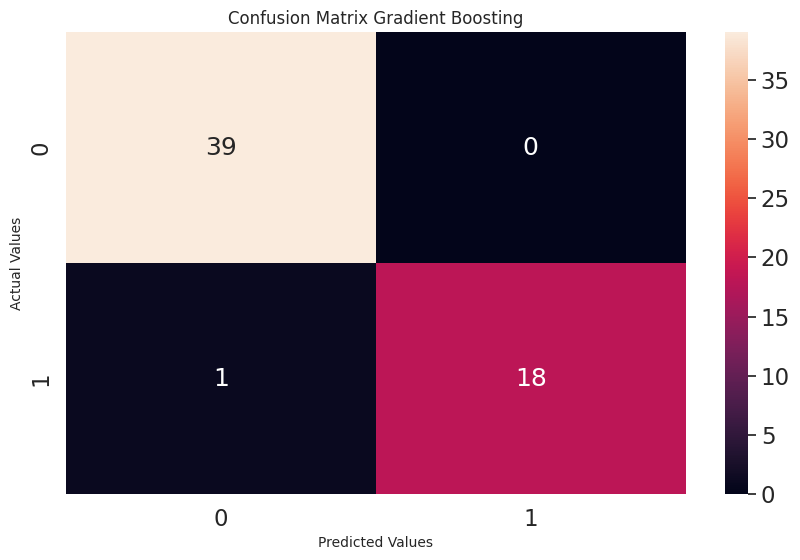

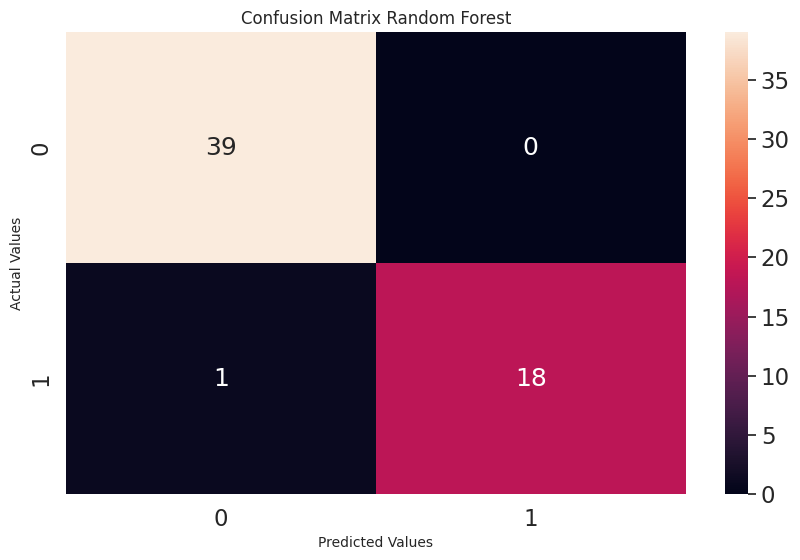

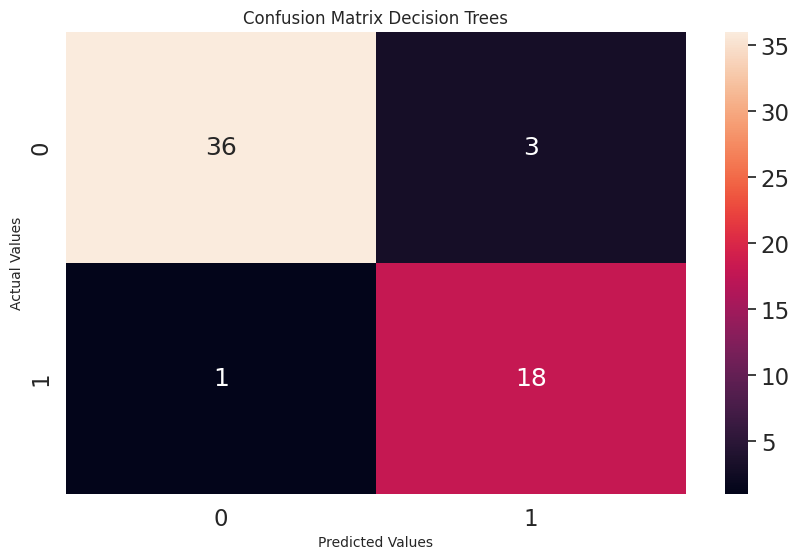

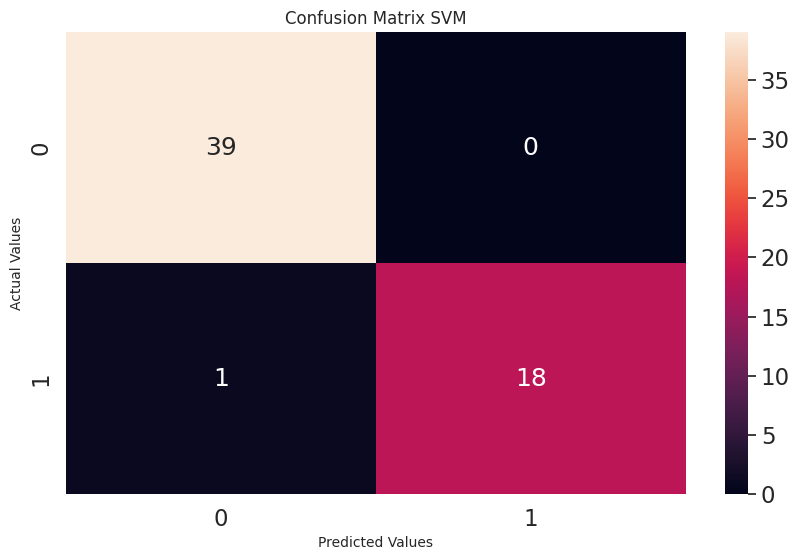

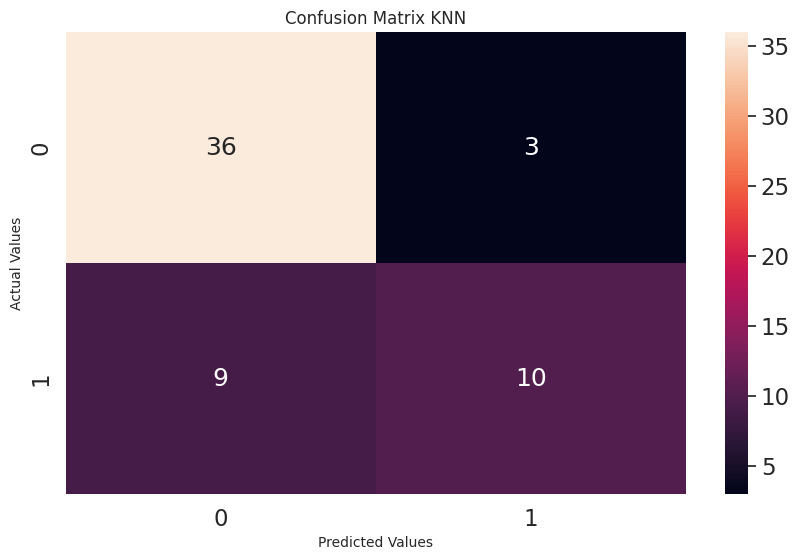

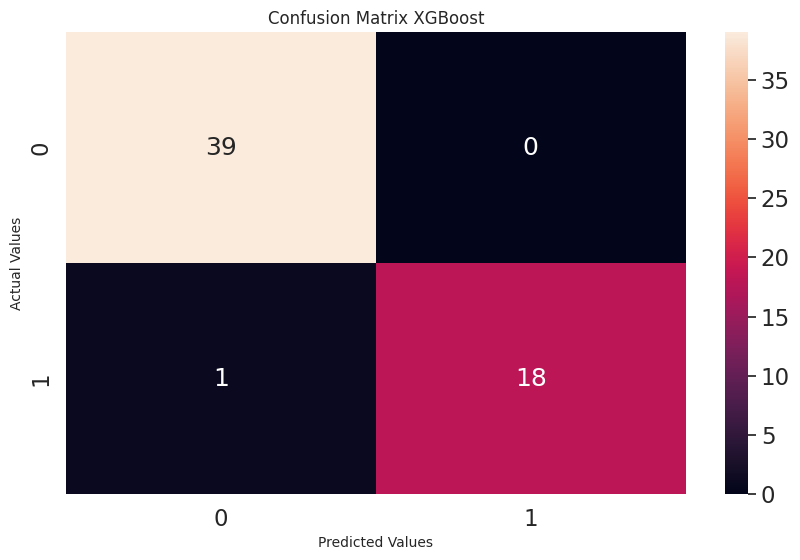

,Model,Accuracy Train (%),Accuracy Test (%),Precision Train (%),Precision Test (%),Recall Train (%),Recall Test (%),F1 Score Train (%),F1 Score Test (%),ROC AUC Train (%),ROC AUC Test (%),CV Accuracy (%),CV Precision (%),CV Recall Test(%),CV Recall Train(%),CV F1 Score (%),CV ROC AUC (%)
0,Gradient Boosting,100.00,98.28,100.0,100.00,100.00,94.74,100.00,97.3,100.00,97.37,97.41,97.27,96.36,100.00,96.79,98.48
1,Random Forest,100.00,98.28,100.0,100.00,100.00,94.74,100.00,97.3,100.00,97.37,98.52,99.09,97.27,100.00,98.14,98.66
2,Decision Trees,100.00,93.10,100.0,85.71,100.00,94.74,100.00,90.0,100.00,93.52,97.04,95.60,97.27,100.00,96.38,97.07
3,SVM,98.52,98.28,100.0,100.00,96.40,94.74,98.17,97.3,98.20,97.37,98.52,100.00,96.36,96.39,98.12,98.95
4,KNN,92.96,79.31,96.0,76.92,86.49,52.63,91.00,62.5,91.99,72.47,84.81,90.56,70.12,83.53,78.64,92.73
5,XGBoost,98.89,98.28,100.0,100.00,97.30,94.74,98.63,97.3,98.65,97.37,98.89,100.00,97.27,97.30,98.58,98.49


In [ ]:
result = evaluate_models(X_train, y_train, X_test, y_test)
result

## Selected Model

Among the various machine learning models that have been explored, XGBoost has been selected as the top-performing model. Following this, hyperparameter tuning will be conducted after standardization to mitigate the risk of overfitting.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model, ytest, pred):
    print('Accuracy(train): %.2f%%' % (accuracy_score(y_train, y_train_pred) * 100 ))
    print('Accuracy(test): %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
    print('-----------'*5)
    print('Precision(train): %.2f%%' % (precision_score(y_train, y_train_pred) * 100))
    print('Precision(test): %.2f%%' % (precision_score(y_test, y_pred) * 100))
    print('-----------'*5)
    print('Recall(train): %.2f%%' % (recall_score(y_train, y_train_pred) * 100))
    print('Recall(test): %.2f%%' % (recall_score(y_test, y_pred) * 100))
    print('-----------'*5)
    print('F1_Score(train): %.2f%%' % (f1_score(y_train, y_train_pred) * 100))
    print('F1_Score(test): %.2f%%' % (f1_score(y_test, y_pred) * 100))
    print('-----------'*5)
    print("ROC AUC(train): %.2f%%" % (roc_auc_score(y_train, y_train_pred)*100))
    print("ROC AUC(test): %.2f%%" % (roc_auc_score(y_test, y_pred)*100))
    print('==========='*5)

def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
from xgboost import XGBClassifier

xg_tuned = XGBClassifier()
xg_tuned.fit(X_train, y_train)
y_pred = xg_tuned.predict(X_test)
y_train_pred = xg_tuned.predict(X_train)
eval_classification(xg_tuned,y_test,y_pred)

Accuracy(train): 98.89%
Accuracy(test): 98.28%
-------------------------------------------------------
Precision(train): 100.00%
Precision(test): 100.00%
-------------------------------------------------------
Recall(train): 97.30%
Recall(test): 94.74%
-------------------------------------------------------
F1_Score(train): 98.63%
F1_Score(test): 97.30%
-------------------------------------------------------
ROC AUC(train): 98.65%
ROC AUC(test): 97.37%


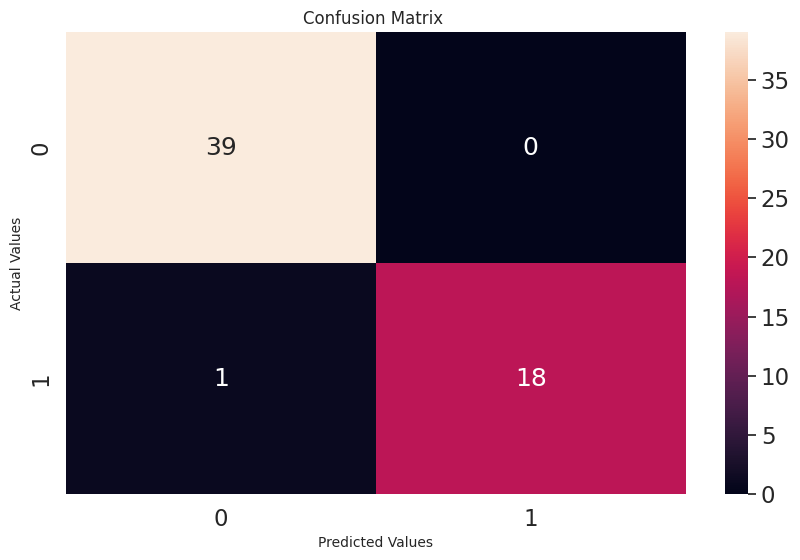

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
plt.title('Confusion Matrix ',fontsize=12)
ax.set_xlabel('Predicted Values',fontsize=10)
ax.set_ylabel('Actual Values',fontsize=10)
plt.show()

**Feature Importance**

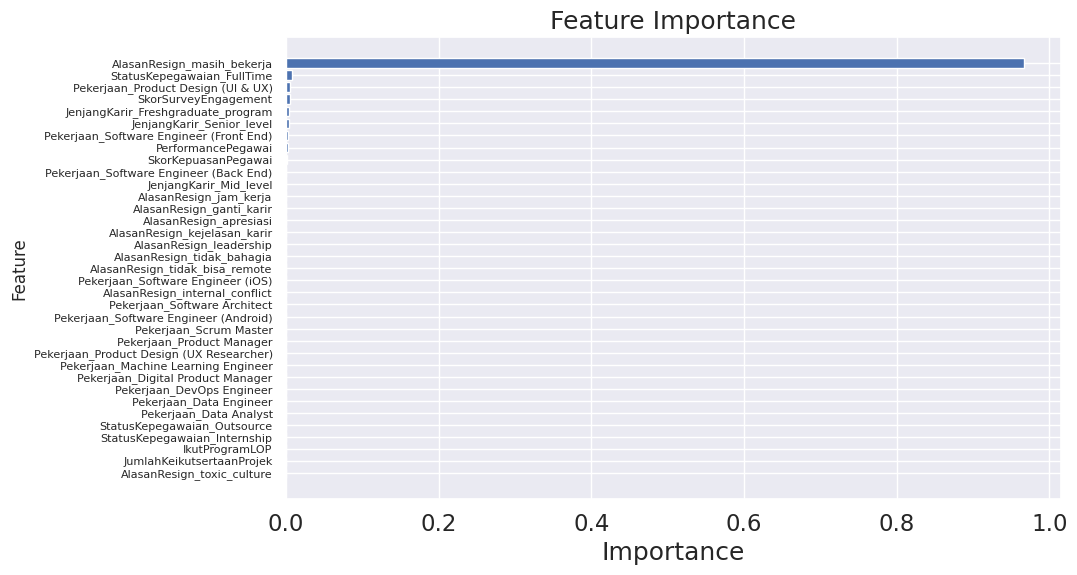

In [ ]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Buat dan latih model XGBoost
xg_tuned = XGBClassifier()
xg_tuned.fit(X_train, y_train)

# Prediksi
y_pred = xg_tuned.predict(X_test)
y_train_pred = xg_tuned.predict(X_train)

# Tampilkan feature importance
feature_importance = xg_tuned.feature_importances_
feature_names = X_train.columns

# Buat dataframe untuk feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Buat grafik feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature',fontsize=12)
plt.yticks(fontsize=8)
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Untuk mengurutkan dari yang tertinggi ke terendah

plt.show()


In [ ]:
data_eda_new_resgin = data_eda[data_eda["resign_flag"] == 1]

data_eda_reisgn_group = data_eda_new_resgin.groupby(['AlasanResign']).agg(
    total_karyawan_resign=('EnterpriseID', 'count')
).reset_index()

data_eda_reisgn_group = data_eda_reisgn_group.sort_values(by='total_karyawan_resign', ascending=False)

data_eda_reisgn_group

,AlasanResign,total_karyawan_resign
3,jam_kerja,16
1,ganti_karir,14
4,kejelasan_karir,11
8,tidak_bisa_remote,11
9,toxic_culture,10
5,leadership,9
7,tidak_bahagia,8
2,internal_conflict,4
6,masih_bekerja,4
0,apresiasi,2


Text(0.5, 1.01, 'Reason Resign')

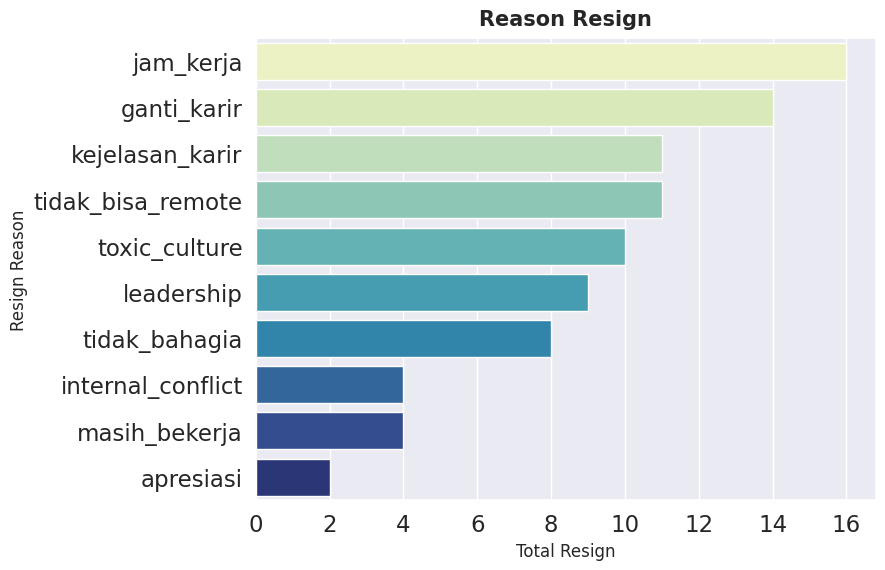

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=data_eda_reisgn_group, y='AlasanResign', x='total_karyawan_resign', palette='YlGnBu')
plt.xlabel("Total Resign",fontsize=12)
plt.ylabel("Resign Reason",fontsize=12)
plt.title('Reason Resign', fontsize=15, weight='bold', y=1.01)